In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

import addict
import copy
import scipy
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import celeri

plt.rcParams["text.usetex"] = False

In [2]:
def greatcircleaz(lat1, lon1, lat2, lon2):
    # Inputs lat1, lon1, lat2, lon2 are in units of radians.
    azimuth = np.arctan2(
        np.cos(np.deg2rad(lat2)) * np.sin(np.deg2rad(lon2) - np.deg2rad(lon1)),
        np.cos(np.deg2rad(lat1)) * np.sin(np.deg2rad(lat2))
        - np.sin(np.deg2rad(lat1))
        * np.cos(np.deg2rad(lat2))
        * np.cos(np.deg2rad(lon2) - np.deg2rad(lon1)),
    )
    return np.rad2deg(azimuth)


def plot_azimuths(segment, lon_range, lat_range):
    for i in range(len(segment)):
        if segment.azimuth[i] >= 0.0:
            plt.plot(
                [segment.lon1[i], segment.lon2[i]],
                [segment.lat1[i], segment.lat2[i]],
                "-k",
                linewidth=0.5,
            )
        else:
            plt.plot(
                [segment.lon1[i], segment.lon2[i]],
                [segment.lat1[i], segment.lat2[i]],
                "-r",
                linewidth=5,
            )
    plt.xlim([lon_range[0], lon_range[1]])
    plt.ylim([lat_range[0], lat_range[1]])
    plt.gca().set_aspect("equal", adjustable="box")

In [3]:
COMMAND_FILE_NAME_WNA = "../data/config/western_north_america_config.json"
COMMAND_FILE_NAME_JAPAN = "../data/config/japan_config.json"

# 1. Japan azimuth comparision

In [4]:
config = celeri.Config.from_file(COMMAND_FILE_NAME_JAPAN)

In [ ]:
celeri.read_data(config)

In [27]:
model_japan = celeri.build_model(COMMAND_FILE_NAME_JAPAN)

azimuth_japan = greatcircleaz(
    model_japan.segment.lat1,
    model_japan.segment.lon1,
    model_japan.segment.lat2,
    model_japan.segment.lon2,
)

2025-05-28 12:22:13.782 | INFO     | celeri.model:read_data:52 - Reading data files
2025-05-28 12:22:13.787 | SUCCESS  | celeri.model:read_data:65 - Read: ../data/segment/qp_japan_segment.csv
2025-05-28 12:22:13.789 | SUCCESS  | celeri.model:read_data:70 - Read: ../data/block/japan_block.csv
2025-05-28 12:22:13.877 | SUCCESS  | celeri.mesh:from_params:465 - Read: ../data/mesh/nankai.msh
2025-05-28 12:22:13.903 | SUCCESS  | celeri.mesh:from_params:465 - Read: ../data/mesh/japan.msh
2025-05-28 12:22:13.922 | SUCCESS  | celeri.mesh:from_params:465 - Read: ../data/mesh/sagami.msh
2025-05-28 12:22:13.927 | SUCCESS  | celeri.model:read_data:108 - Read: ../data/station/japan_station.csv
2025-05-28 12:22:13.929 | SUCCESS  | celeri.model:read_data:128 - Read: ../data/mogi/japan_mogi.csv
2025-05-28 12:22:13.931 | INFO     | celeri.model:read_data:147 - No sar_file_name


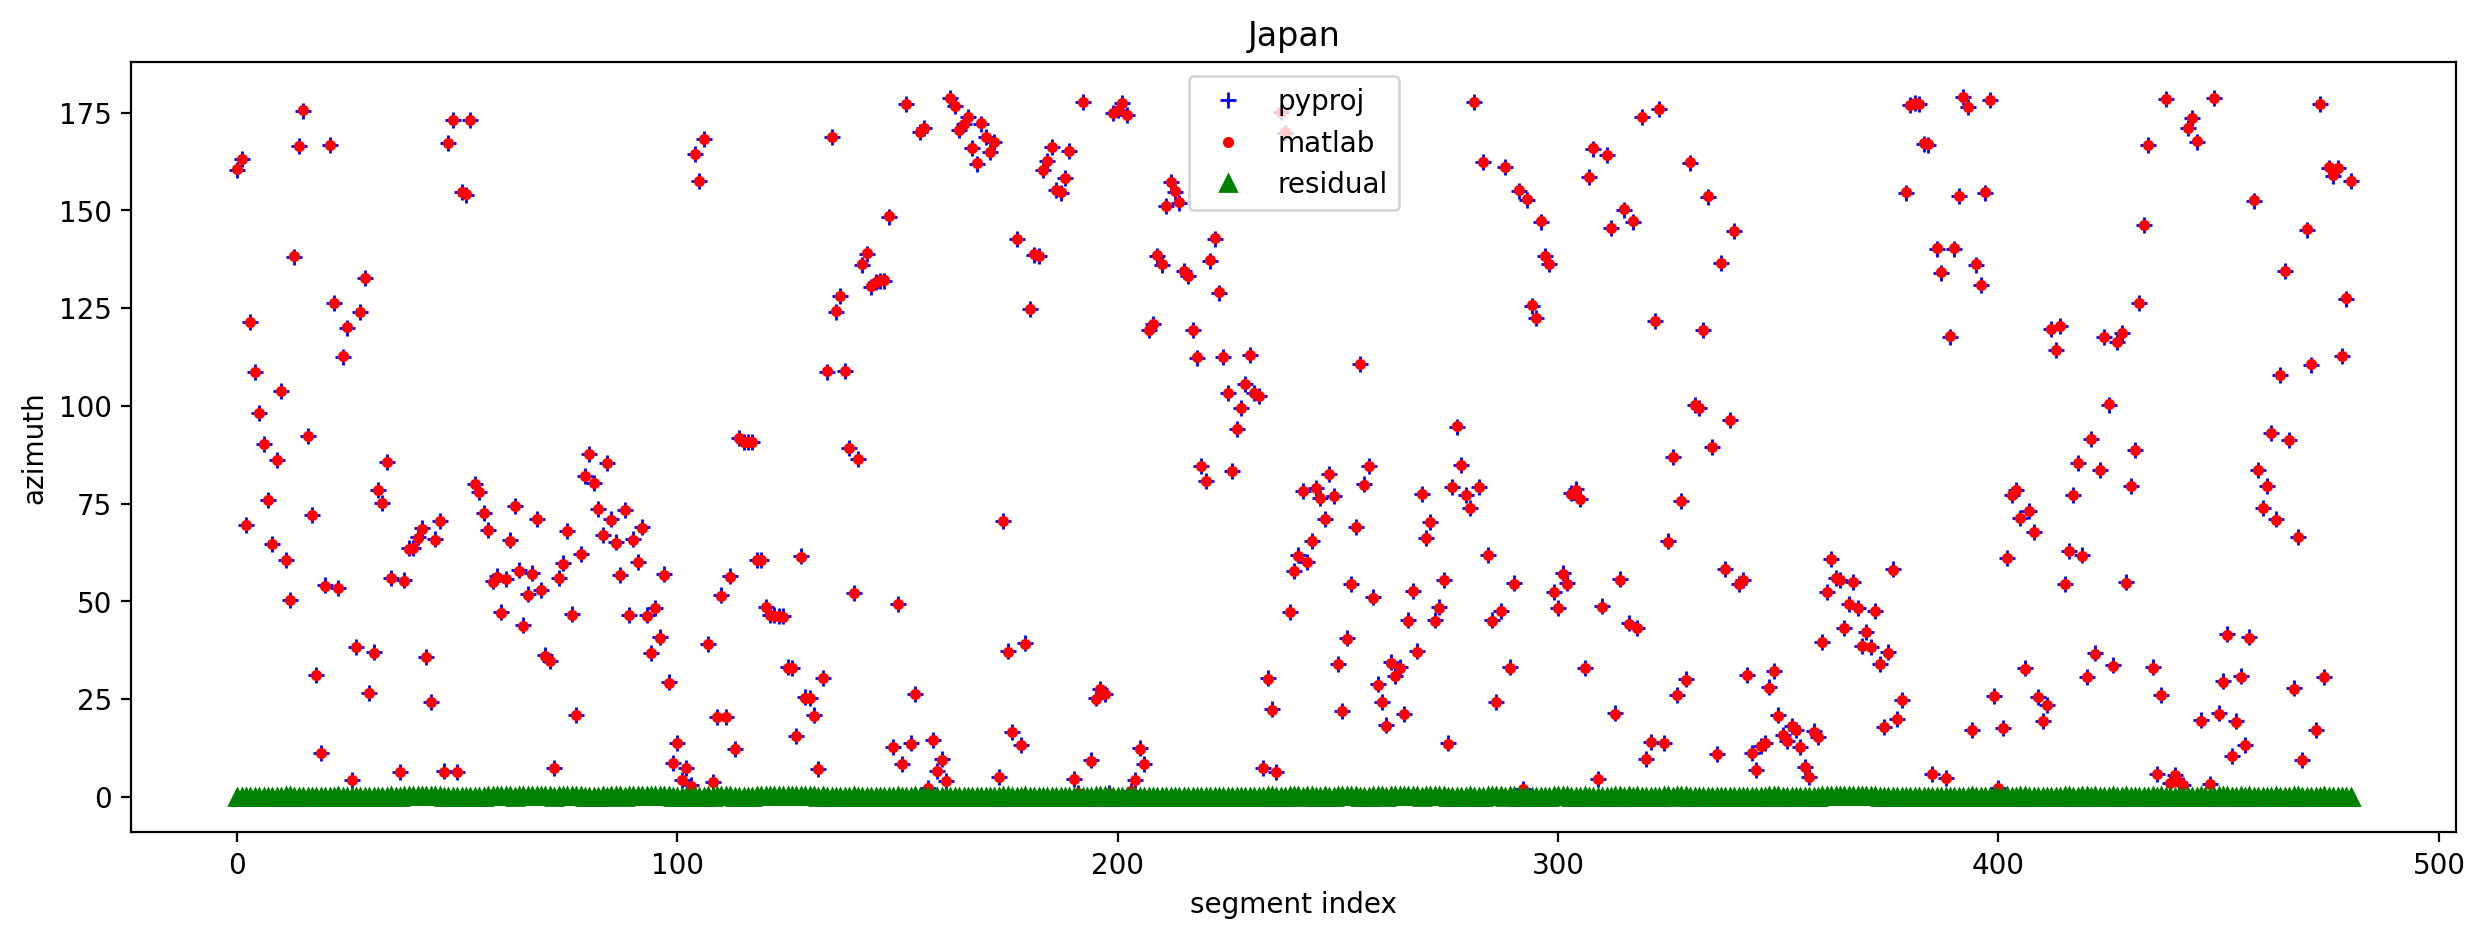

In [31]:
# TODO(Brendan): This now doesn't show much difference between pyproj and matlab,
# when previously it did in the first plot, but not in the second plot. I don't
# really understand what's going on here. Why did this plot change between
# the first time and second time in the original notebook?
plt.figure(figsize=(15, 5))
plt.plot(model_japan.segment.azimuth, "b+", label="pyproj")
plt.plot(azimuth_japan, "r.", label="matlab")
plt.plot(model_japan.segment.azimuth - azimuth_japan, "g^", label="residual")
plt.title("Japan")
plt.xlabel("segment index")
plt.ylabel("azimuth")
plt.legend()
plt.show()

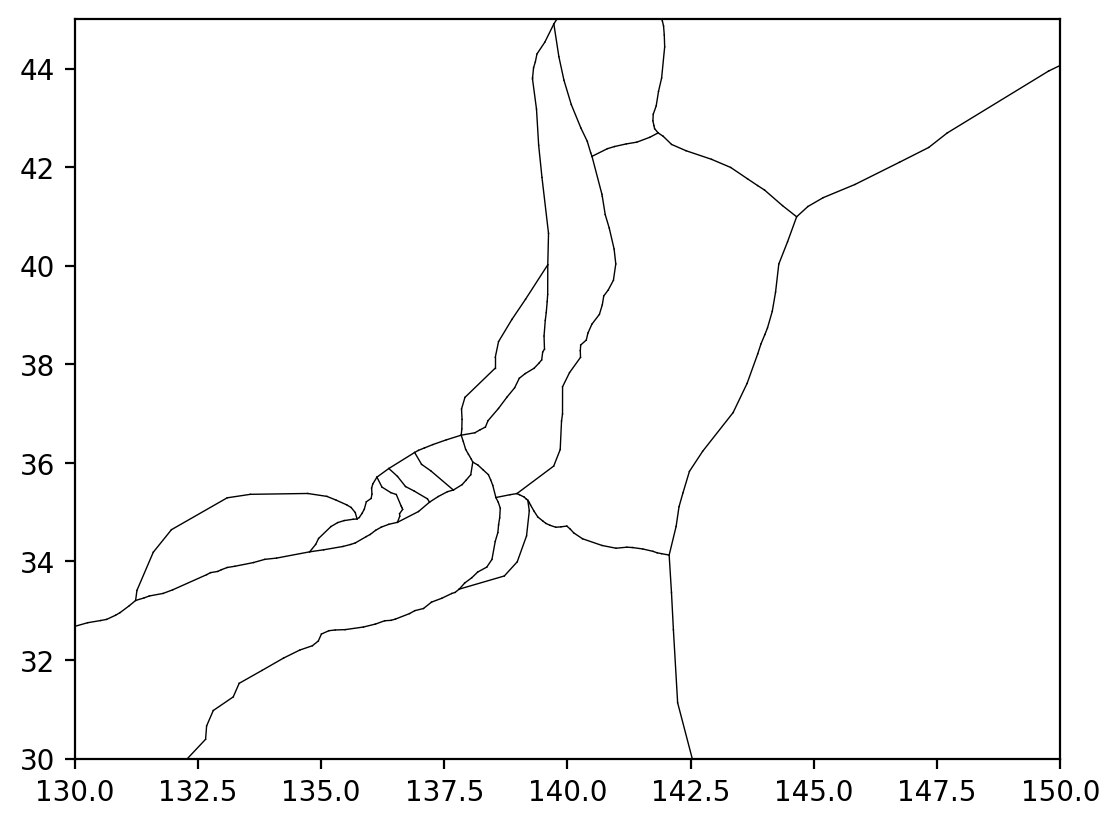

In [32]:
plot_azimuths(
    model_japan.segment, model_japan.config.lon_range, model_japan.config.lat_range
)

# 2. Western North Americal azimuth comparision

In [33]:
model_wna = celeri.build_model(COMMAND_FILE_NAME_WNA)

azimuth_wna = greatcircleaz(
    model_wna.segment.lat1,
    model_wna.segment.lon1,
    model_wna.segment.lat2,
    model_wna.segment.lon2,
)

2025-05-28 12:24:53.671 | INFO     | celeri.model:read_data:52 - Reading data files
2025-05-28 12:24:53.676 | SUCCESS  | celeri.model:read_data:65 - Read: ../data/segment/western_north_america_segment_cascdip.csv
2025-05-28 12:24:53.679 | SUCCESS  | celeri.model:read_data:70 - Read: ../data/block/western_north_america_block.csv
2025-05-28 12:24:53.828 | SUCCESS  | celeri.mesh:from_params:465 - Read: ../data/mesh/cascadia.msh
2025-05-28 12:24:53.832 | SUCCESS  | celeri.model:read_data:108 - Read: ../data/station/western_north_america_station.csv
2025-05-28 12:24:53.833 | INFO     | celeri.model:read_data:124 - No mogi_file_name
2025-05-28 12:24:53.834 | INFO     | celeri.model:read_data:147 - No sar_file_name


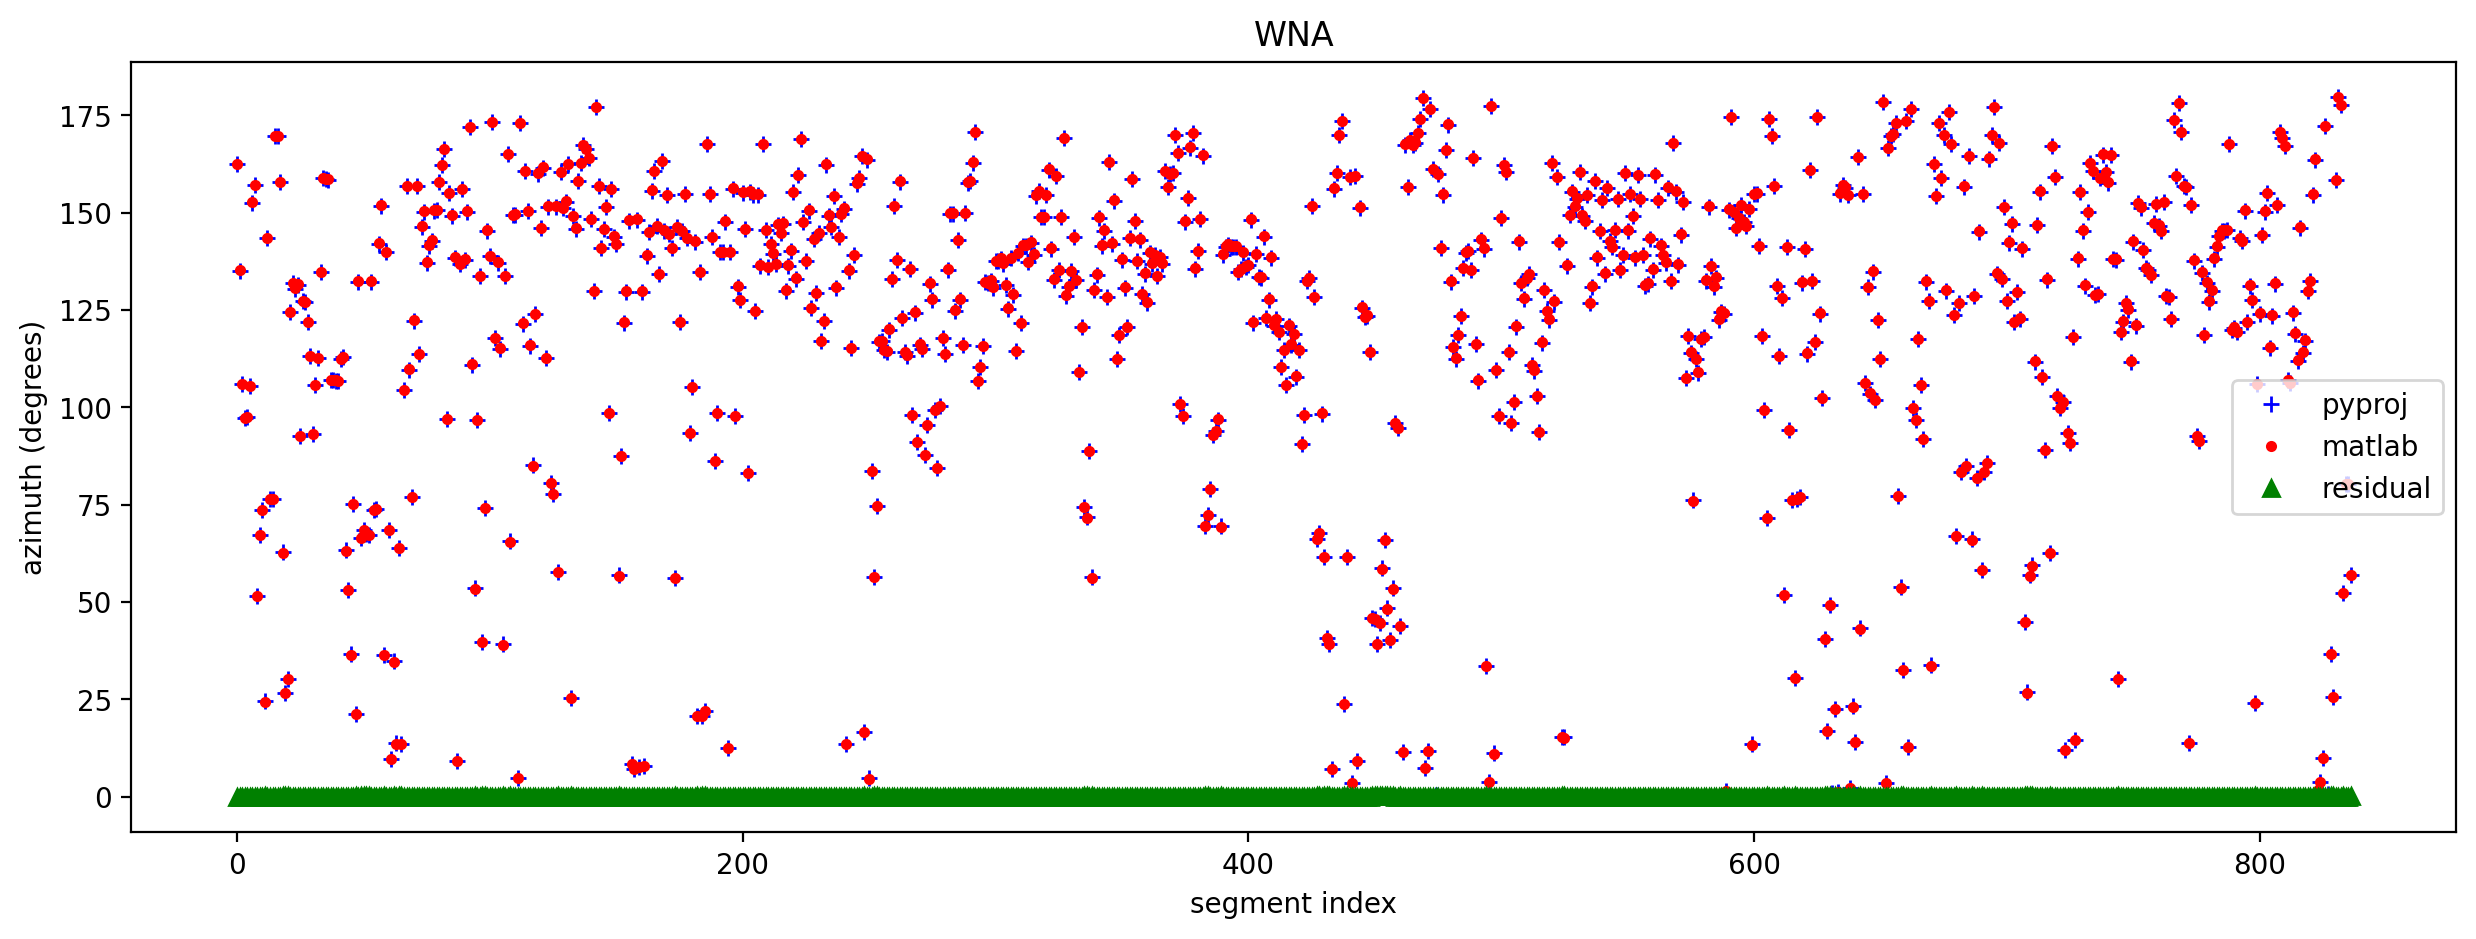

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(model_wna.segment.azimuth, "b+", label="pyproj")
plt.plot(azimuth_wna, "r.", label="matlab")
plt.plot(model_wna.segment.azimuth - azimuth_wna, "g^", label="residual")
plt.title("WNA")
plt.xlabel("segment index")
plt.ylabel("azimuth (degrees)")
plt.legend()
plt.show()

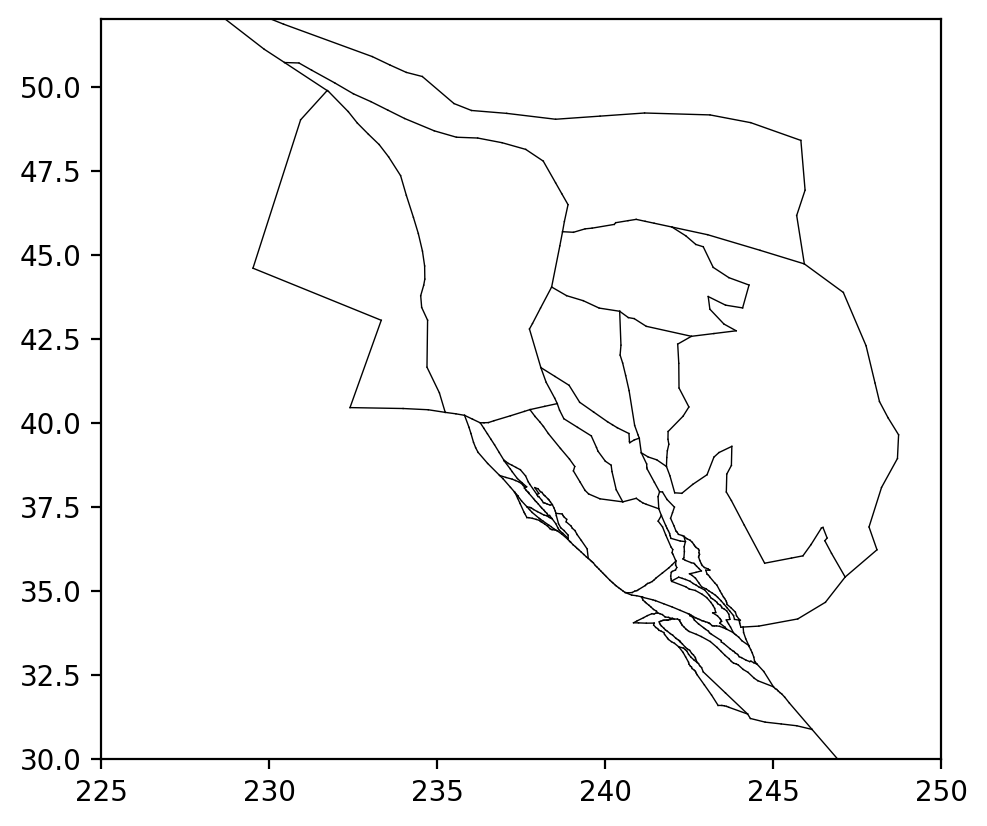

In [36]:
plot_azimuths(model_wna.segment, model_wna.config.lon_range, model_wna.config.lat_range)

In [42]:
# TODO(Brendan): The remainder of the notebook looks redundant now?

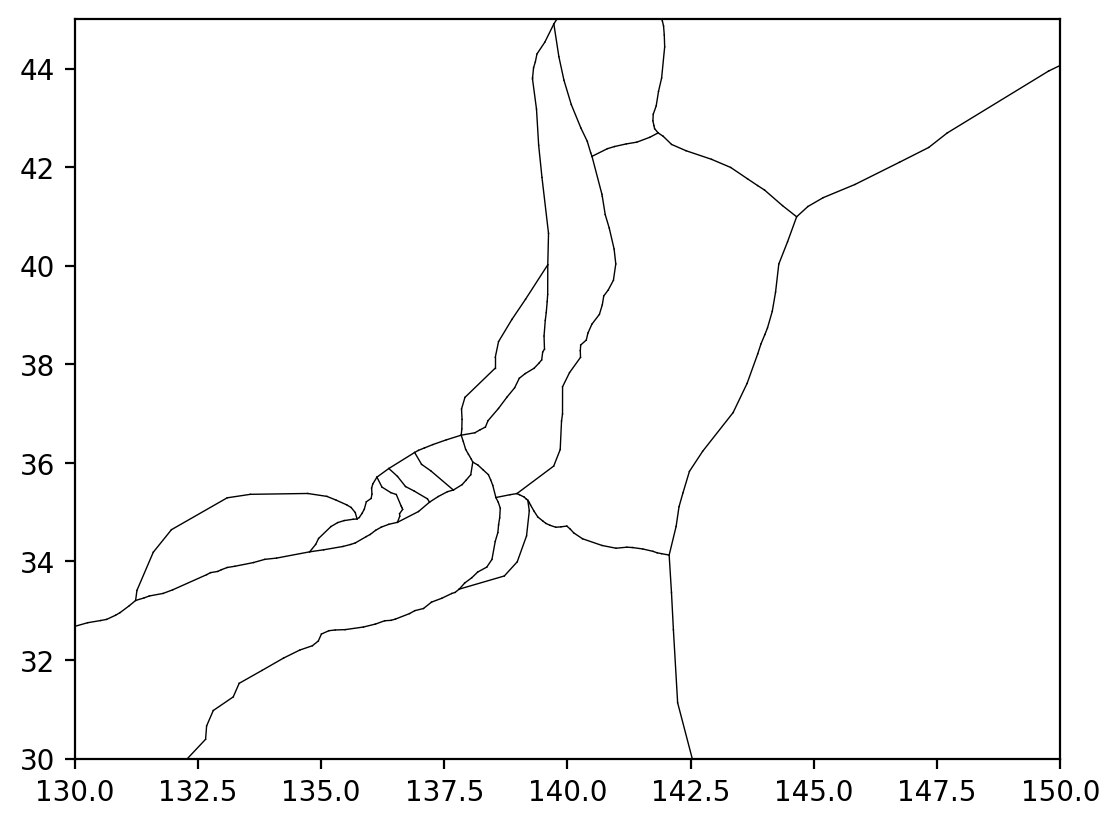

In [38]:
def plot_stuff(segment, lon_range, lat_range):
    for i in range(len(segment)):
        if segment.lon1[i] <= segment.lon2[i]:
            plt.plot(
                [segment.lon1[i], segment.lon2[i]],
                [segment.lat1[i], segment.lat2[i]],
                "-k",
                linewidth=0.5,
            )
        else:
            plt.plot(
                [segment.lon1[i], segment.lon2[i]],
                [segment.lat1[i], segment.lat2[i]],
                "-r",
                linewidth=5,
            )
    plt.xlim([lon_range[0], lon_range[1]])
    plt.ylim([lat_range[0], lat_range[1]])
    plt.gca().set_aspect("equal", adjustable="box")


segment_japan = celeri.process_segment(
    model_japan.segment, model_japan.config, model_japan.meshes
)
plot_azimuths(segment_japan, model_japan.config.lon_range, model_japan.config.lat_range)

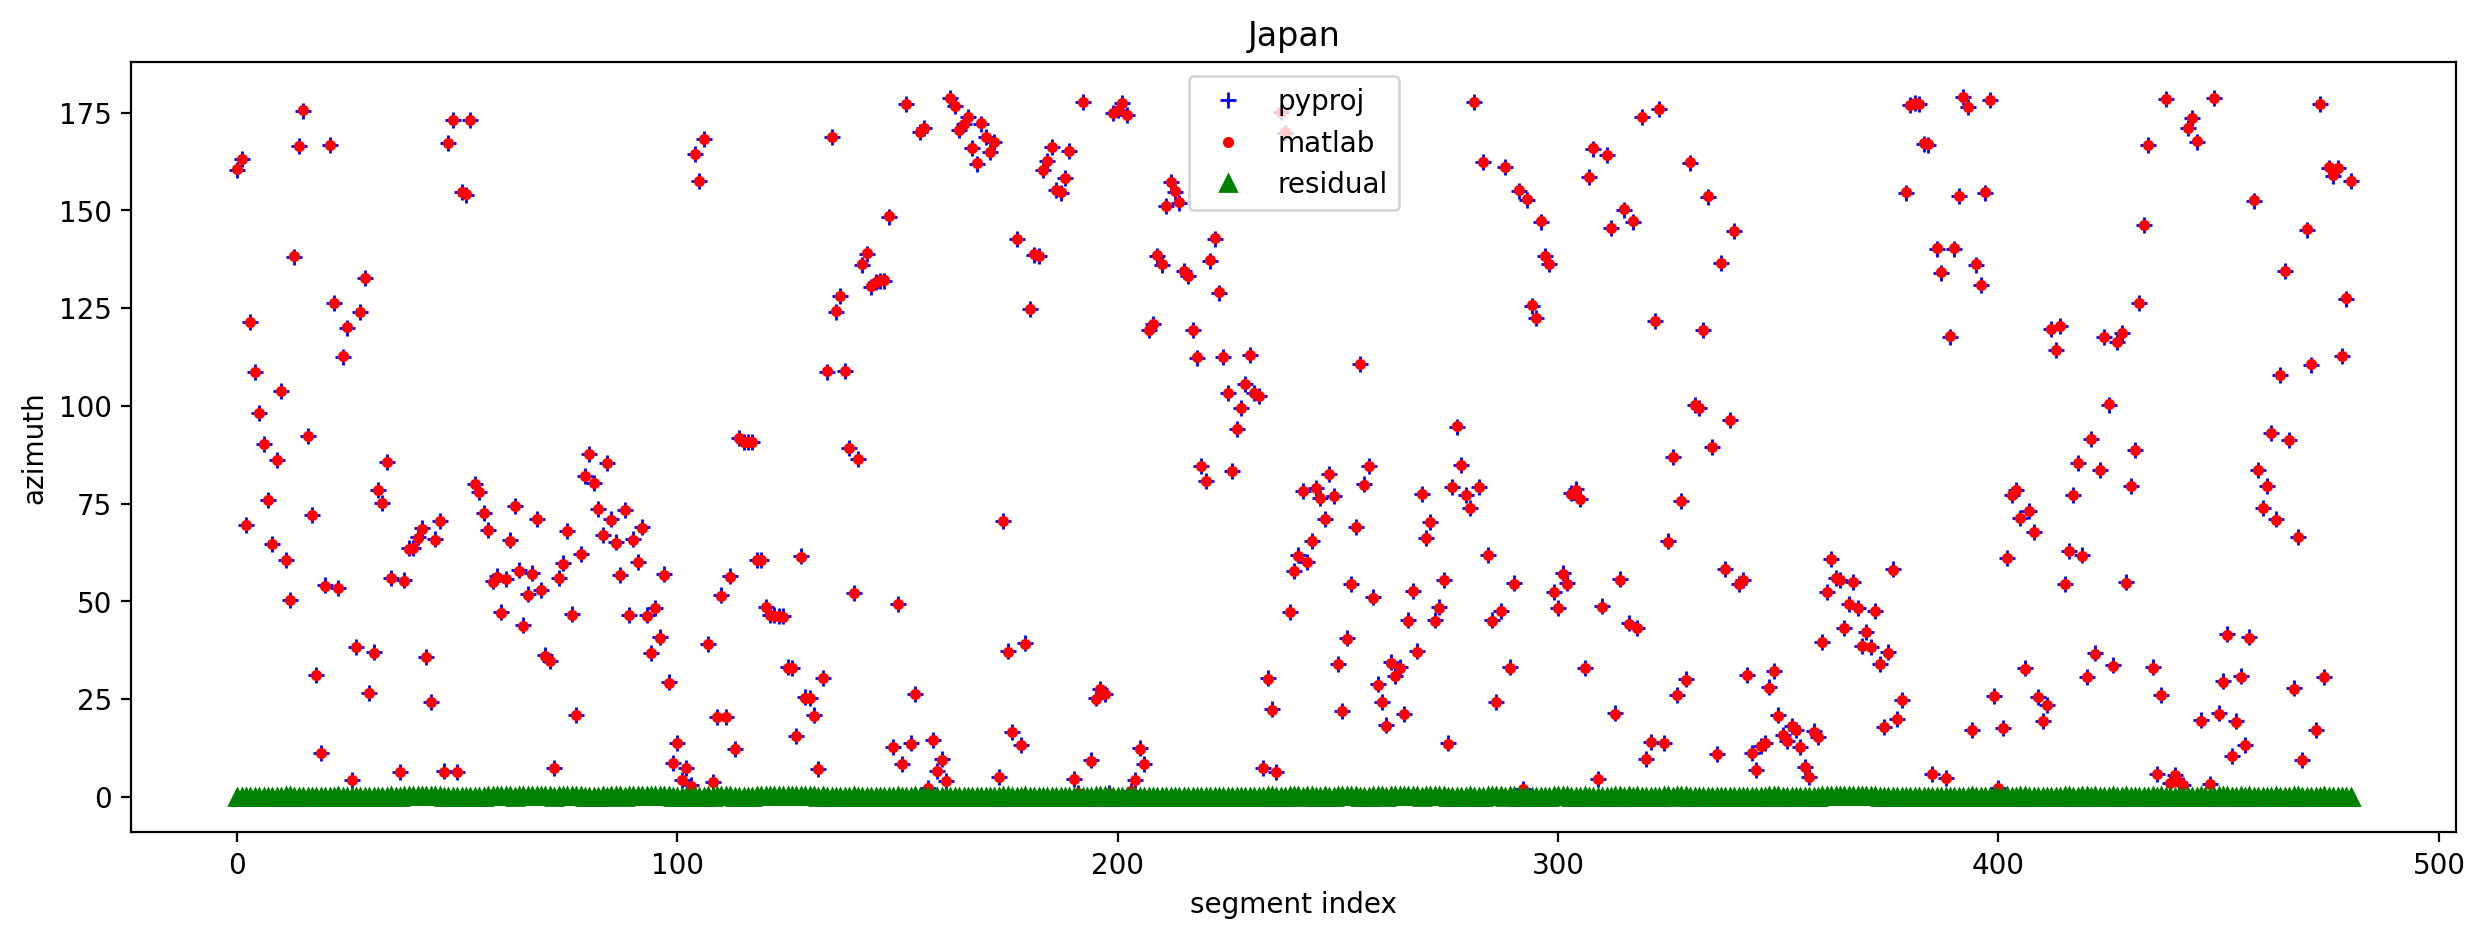

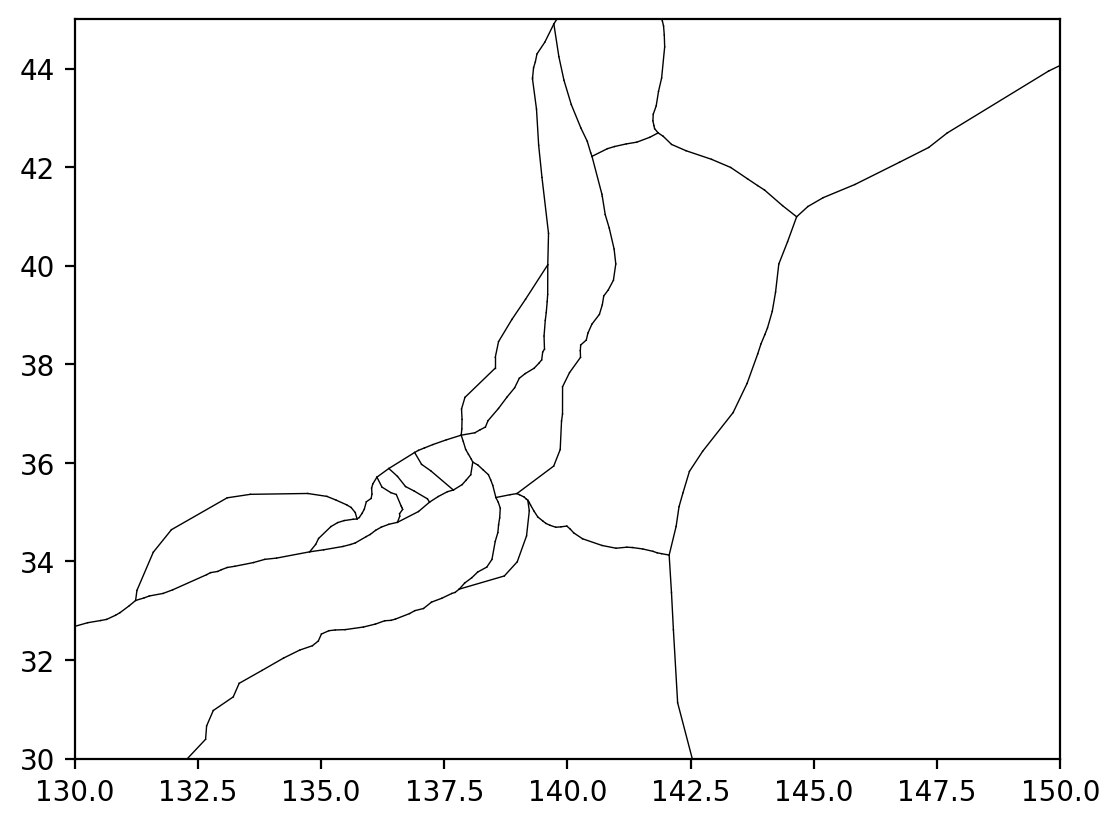

In [40]:
segment_japan = celeri.process_segment(
    model_japan.segment, model_japan.config, model_japan.meshes
)

plt.figure(figsize=(15, 5))
plt.plot(segment_japan.azimuth, "b+", label="pyproj")
plt.plot(azimuth_japan, "r.", label="matlab")
plt.plot(segment_japan.azimuth - azimuth_japan, "g^", label="residual")
plt.title("Japan")
plt.xlabel("segment index")
plt.ylabel("azimuth")
plt.legend()
plt.show()

plot_azimuths(segment_japan, model_japan.config.lon_range, model_japan.config.lat_range)